<a href="https://colab.research.google.com/github/matheoBM/Depth-of-general-anesthesia-in-patients/blob/main/CrossValidation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, GridSearchCV, KFold, PredefinedSplit
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = '/content/drive/MyDrive/Anestesia/Colab/TodosOsPediátricos'
SET_SEED = 42
np.random.seed(SET_SEED)

#Criação de um score para coeficiente e para rmse
#Será usado no cross_validate
def get_r_numpy_corrcoef_scorer(estimator, X, y):
    y_pred = estimator.predict(X)
    return np.corrcoef(y, y_pred)[0,1]
def mean_squared_error_score(estimator, X, y):
    y_pred = estimator.predict(X)
    return mean_squared_error(y, y_pred, squared = False)

In [ ]:
df = pd.read_csv(f'{PATH}/Dados0.csv', index_col=0)
df['Paciente'] = 0
for i in range(1,9):
  df_temp = pd.read_csv(f'{PATH}/Dados{i}.csv', index_col=0)
  df_temp['Paciente'] = i
  df = df.append(df_temp)
df.drop('TimeDate', axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

#df = df[(df['NINDEX'] > 45) & (df['NINDEX'] <= 70)]
#df.reset_index(drop=True, inplace=True)
df

,ac,dc,asym_porta,asym_guzik,asym_ehlers,samp_entropy,fuzzy_entropy,dist_entropy,perm_entropy,disp_entropy,...,fragW1,fragW2,fragW3,multi_scale,zeroV,oneV,twoLV,twoUV,NINDEX,Paciente
0,-0.001933,0.003802,38.028169,59.038055,1.969013,0.036779,0.002144,0.779719,0.985228,1.214440,...,22.972973,55.405405,20.270270,0.762107,43,22,0,11,39.08,0
1,-0.002729,0.004244,37.313433,53.680792,-1.331306,0.023120,0.002643,0.760710,0.942683,1.233686,...,23.611111,51.388889,22.222222,0.790920,49,22,0,3,39.09,0
2,-0.002943,0.004569,35.937500,53.197531,-1.056241,0.001262,0.003073,0.699537,0.947707,1.676093,...,25.000000,50.000000,20.588235,0.815733,33,28,1,8,39.59,0
3,-0.004108,0.003868,45.454545,43.578267,-4.692379,-0.000000,0.003202,0.669715,0.994985,1.718958,...,24.637681,39.130435,24.637681,0.832967,14,36,6,15,40.69,0
4,-0.005303,0.003328,55.882353,34.250801,-8.366985,0.028883,0.003454,0.767294,0.997891,1.555237,...,26.760563,33.802817,22.535211,0.809880,39,24,1,9,41.66,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1940,-0.001589,0.002430,64.028777,59.897292,4.465802,-0.000000,0.000765,0.419775,0.968546,2.125285,...,39.041096,56.164384,4.794521,0.398187,7,57,39,45,97.98,8
1941,-0.001554,0.002392,63.120567,60.939725,4.780057,-0.000000,0.000747,0.442053,0.948078,2.050297,...,40.136054,55.102041,4.761905,0.397087,4,64,35,46,97.86,8
1942,-0.001491,0.002324,63.043478,60.931334,4.794312,-0.000000,0.000679,0.401047,0.966917,1.955245,...,34.013605,59.183673,6.802721,0.396140,3,52,43,51,97.82,8
1943,-0.001547,0.002363,63.309353,61.242747,4.830196,-0.000000,0.000728,0.408825,0.965268,1.904126,...,31.756757,60.810811,7.432432,0.395153,2,58,42,48,97.83,8


In [ ]:
X = np.array(df.iloc[:, 0:23])
y = df['NINDEX']

Coefficiente:  0.9176240767493461
RMSE:  6.533782334043866
Coeficiente:  0.12045996019805248
RMSE 14.953966999837277


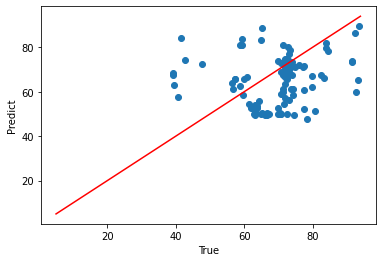

Coefficiente:  0.8993460393675768
RMSE:  7.285516933830858
Coeficiente:  -0.45735921835234805
RMSE 12.582196084497246


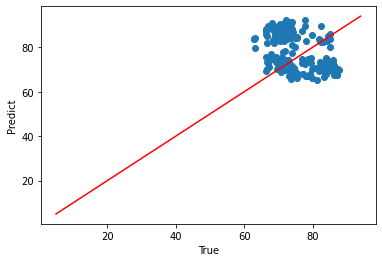

Coefficiente:  0.9001865132444937
RMSE:  7.108221877438114
Coeficiente:  0.11862646398710358
RMSE 10.402468167133183


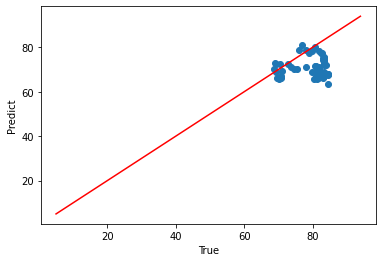

Coefficiente:  0.9034790457850518
RMSE:  6.651476649737698
Coeficiente:  -0.2693084106524426
RMSE 24.160231018789325


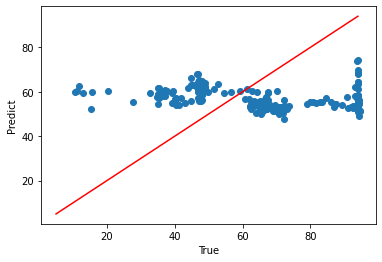

Coefficiente:  0.9122959240012506
RMSE:  6.860109791026898
Coeficiente:  -0.3957786565065271
RMSE 18.412319857424293


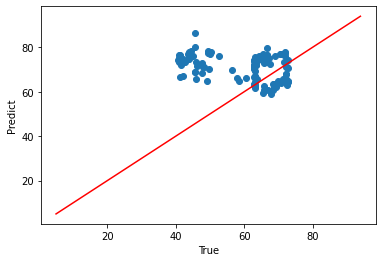

Coefficiente:  0.8935861544309848
RMSE:  8.266536535356654
Coeficiente:  -0.14278066899542505
RMSE 16.281246147484993


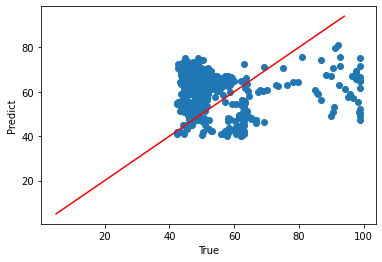

Coefficiente:  0.9003626334340369
RMSE:  7.013986427881714
Coeficiente:  0.5922130637650609
RMSE 25.110975067121544


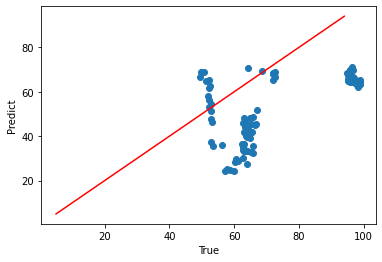

Coefficiente:  0.9125223522698876
RMSE:  6.729570272507074
Coeficiente:  -0.35284043608447085
RMSE 18.543297047824215


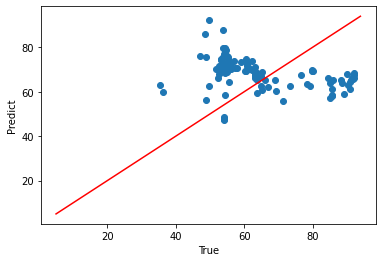

Coefficiente:  0.9167955297533628
RMSE:  6.203599088836286
Coeficiente:  -0.08912384955511209
RMSE 32.22091858931243


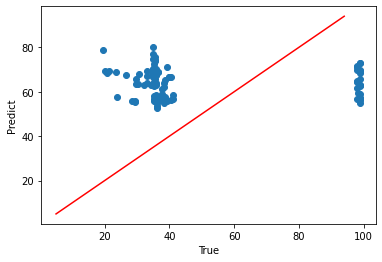

In [ ]:
resultados = {'Coef Cross':[], 'RMSE Cross':[], 'Coef Teste':[], 'RMSE Teste': []} #Tabela para guardar os resultados
ps = PredefinedSplit(df['Paciente'])
for train_index, test_index in ps.split():
    X_train, y_train = X[train_index], y[train_index]
    X_test, y_test = X[test_index], y[test_index]
    
    #Escalona
    scaler = MinMaxScaler((-1,1)).fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    y_test = np.array(y_test)
    y_train = np.array(y_train)
    
    #Treina
    #mlp = MLPRegressor(hidden_layer_sizes=(47,), learning_rate_init=0.01,solver='adam', max_iter=2500, activation='tanh', random_state=42)
    #mlp = MLPRegressor(hidden_layer_sizes=(47,), learning_rate_init=0.1,solver='sgd', max_iter=1500, activation='tanh', random_state=42)
    #mlp = LinearRegression()
    mlp = RandomForestRegressor(n_estimators=50)
    cv = KFold(n_splits=10, shuffle=True, random_state=42)
    cross_val = cross_validate(mlp, X_train, y_train, cv=cv, scoring= {'r':get_r_numpy_corrcoef_scorer, 'rmse':mean_squared_error_score}, return_train_score=True)
    
    #Calculando a média do coeficiente e rmse de teste 
    pearson =  np.mean(cross_val['test_r'])
    rmse = np.mean(cross_val['test_rmse'])
    print("Coefficiente: ",  pearson)
    print("RMSE: ", rmse)

    resultados['Coef Cross'].append(pearson)
    resultados['RMSE Cross'].append(rmse)

    #mlp = MLPRegressor(hidden_layer_sizes=(47,), learning_rate_init=0.1,solver='adam', max_iter=500, activation='tanh', random_state=42)
    mlp.fit(X_train, y_train)
    predict = mlp.predict(X_test)
    pearson = np.corrcoef(y_test, predict)[0,1]
    rmse = mean_squared_error(y_test, predict, squared=False)
    print('Coeficiente: ', pearson)
    print('RMSE', rmse)
    plt.scatter(y_test, predict)
    plt.xlabel('True')
    plt.ylabel('Predict')
    
    plt.plot(range(5, 95), range(5,95), 'red')
    plt.show()

    resultados['Coef Teste'].append(pearson)
    resultados['RMSE Teste'].append(rmse)

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

pd.DataFrame(resultados)

,Coef Cross,RMSE Cross,Coef Teste,RMSE Teste
0,0.917624,6.533782,0.120460,14.953967
1,0.899346,7.285517,-0.457359,12.582196
2,0.900187,7.108222,0.118626,10.402468
3,0.903479,6.651477,-0.269308,24.160231
4,0.912296,6.860110,-0.395779,18.412320
5,0.893586,8.266537,-0.142781,16.281246
6,0.900363,7.013986,0.592213,25.110975
7,0.912522,6.729570,-0.352840,18.543297
8,0.916796,6.203599,-0.089124,32.220919


In [ ]:
pd.DataFrame(resultados)['Coef Teste'].mean()

-0.005728725559681676

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'hidden_layer_sizes':[(47,), (23,), (11, )], 'learning_rate_init':[0.1, 0.01, 0.001],  'max_iter':[300, 1000, 1500, 2000]}
grid = GridSearchCV(MLPRegressor(activation='tanh', solver='adam'), parameters, cv=10)
scaler = MinMaxScaler((-1,1)).fit(X)
X_scale = scaler.transform(X) 
grid.fit(X_scale, y)



/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multi

GridSearchCV(cv=10, estimator=MLPRegressor(activation='tanh'),
             param_grid={'hidden_layer_sizes': [(47,), (23,), (11,)],
                         'learning_rate_init': [0.1, 0.01, 0.001],
                         'max_iter': [300, 1000, 1500, 2000]})

In [ ]:
pd.DataFrame(grid.cv_results_['params'], grid.cv_results_['rank_test_score']).head(73)


,hidden_layer_sizes,learning_rate_init,max_iter
14,"(47,)",0.100,300
15,"(47,)",0.100,1000
5,"(47,)",0.100,1500
6,"(47,)",0.100,2000
35,"(47,)",0.010,300
29,"(47,)",0.010,1000
36,"(47,)",0.010,1500
34,"(47,)",0.010,2000
11,"(47,)",0.001,300
26,"(47,)",0.001,1000


In [ ]:
grid.best_score_

-0.6858242499661623

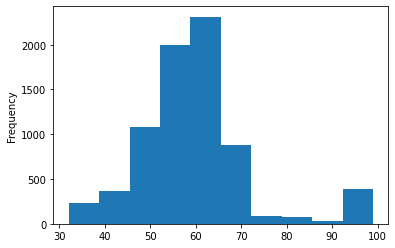

In [ ]:
df['NINDEX'].plot(kind='hist')
plt.show()